<a href="https://colab.research.google.com/github/Suaif/analyzing_the_idiot/blob/main/IRTM_Project_Report_Ismael_Gomez_i6334570.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data preprocessing

## Loading and separating

In [ ]:
# The book is part of the Gutenberg Project -> https://gutenberg.org/files/2638/2638-0.txt
# In this text file the introduction and license have been manually removed

with open("/content/drive/MyDrive/Maastricht Univesity/Information Retrieval and Text Mining/Project/the_idiot_raw.txt", 'r') as file:
    # Read the contents of the file into a string
    book = file.read()

book = book.replace("\n", " ")
book[:1000]

'\ufeffPART I   I.  Towards the end of November, during a thaw, at nine o’clock one morning, a train on the Warsaw and Petersburg railway was approaching the latter city at full speed. The morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking; and it was impossible to distinguish anything more than a few yards away from the carriage windows.  Some of the passengers by this particular train were returning from abroad; but the third-class carriages were the best filled, chiefly with insignificant persons of various occupations and degrees, picked up at the different stations nearer town. All of them seemed weary, and most of them had sleepy eyes and a shivering expression, while their complexions generally appeared to have taken on the colour of the fog outside.  When day dawned, two passengers in one of the third-class carriages found themselves opposite each other. Both were young fellows, both were rather poorly dressed, both had remar

In [ ]:
# Divide by parts
parts = book.split("PART ")
parts = parts[1:]
parts[0] = parts[0][3:]
parts[1] = parts[1][4:]
parts[2] = parts[2][5:]
parts[3] = parts[3][4:]

print("Parts of the book:")
[print(part[:100], len(part)) for part in parts];

import copy
import re

# Divide by chapters
chapter_markers = [" I"," II"," III"," IV"," V"," VI"," VII"," VIII"," IX"," X"," XI"," XII"," XIII"," XIV"," XV"," XVI"]
chapters_dict = {0:16, 1:12, 2:10, 3:12} # How many chapters in each part
chapters = []

for n_part, part in enumerate(parts):

  for n_chapter in range(chapters_dict[n_part]):

    if n_chapter < (chapters_dict[n_part] - 1):

      pattern = r'{}\.(.*?){}\.'.format(chapter_markers[n_chapter], chapter_markers[n_chapter+1])
      
      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters.append(chapter)
    
    else: # For the last chapter
      pattern = r'{}\.(.*)'.format(chapter_markers[n_chapter])

      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters.append(chapter)

print("\nNumber of chpaters in the book: ", len(chapters))

for i, chapter in enumerate(chapters[:3]):
  print(i, chapter[:50], "   |   ", chapter[-50:])

Parts of the book:
 I.  Towards the end of November, during a thaw, at nine o’clock one morning, a train on the Warsaw  375224
 I.  Two days after the strange conclusion to Nastasia Philipovna’s birthday party, with the record  313469
 I.  The Epanchin family, or at least the more serious members of it, were sometimes grieved because 305827
 I.  A week had elapsed since the rendezvous of our two friends on the green bench in the park, when 353028

Number of chpaters in the book:  50
0 Towards the end of November, during a thaw, at nin    |     his destination, he determined to take a droshky.
1 General Epanchin lived in his own house near the L    |    e voice of Gania cried:  “Come in please, prince!”
2 General Ivan Fedorovitch Epanchin was standing in     |    ince immediately followed the man out of the room.


In [ ]:
# Divide by sentences
import nltk
from nltk import sent_tokenize

nltk.download("punkt")

sentences = [sent_tokenize(chapter) for chapter in chapters]

print("Sentences by chapter:")
["Chapter " + str(i) + " : " + str(len(sentences[i])) for i in range(5)]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sentences by chapter:


['Chapter 0 : 184',
 'Chapter 1 : 178',
 'Chapter 2 : 271',
 'Chapter 3 : 185',
 'Chapter 4 : 326']

## Named Entity Recognition

In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize, pos_tag, sent_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import svgling

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Raw extraction of entities using chunking
doc = book
sentences = sent_tokenize(doc)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

chunks = []
entities = []
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):
            entity_text = " ".join(leaf[0] for leaf in chunk.leaves()) # The entity categorization is ignored
            chunks.append(chunk)
            entities.append(entity_text)
            # print(chunk) 

print(len(chunks))
# print(chunks[:10])
# print(entities[:10])

# Removing duplicates
entities = sorted(list(set(entities)))
print("Entities after duplicates: ", len(entities))
entities

6409
Entities after duplicates:  776


['Abbot Pafnute',
 'Abstract',
 'Academy',
 'Accept',
 'Add',
 'Added',
 'Adelaida',
 'Adelaida Ivanovna',
 'Admit',
 'Afanasy',
 'Afanasy Ivanovitch',
 'Afanasy Ivanovitch Totski',
 'Again',
 'Again Nastasia Philipovna',
 'Agatha',
 'Aglaya',
 'Aglaya Ivanovitch',
 'Aglaya Ivanovna',
 'Aglaya Ivanovna Epanchin',
 'Ah',
 'Aha',
 'Alas',
 'Aleksey',
 'Alexander',
 'Alexandra',
 'Alexandra Ivanovna',
 'Alexandra Michailovna',
 'Alexandrovitch',
 'Alexandrovna',
 'Alexey',
 'Alexeyevna',
 'Allah',
 'Almighty',
 'Almost',
 'America',
 'American',
 'And—and',
 'Anfisa',
 'Anfisa Alexeyevna',
 'Anisia',
 'Anna Fedorovna',
 'Annenkoff',
 'Answer',
 'Antichrist',
 'Antip',
 'Antip Burdovsky',
 'Anyone',
 'Anything',
 'Apocalypse',
 'Apologizing',
 'Apostle',
 'Ardalion',
 'Ardalion Alexandrovitch',
 'Ardalion Alexandrovitch Ivolgin',
 'Ardalionovitch',
 'Ardalionovna',
 'Aren',
 'Aristocrat',
 'Arrived',
 'Ask',
 'Asleep',
 'Ass',
 'Assizes',
 'Atheism',
 'Atheist',
 'Austrian Emperor',
 'Away

In [ ]:
from nltk.corpus import words
nltk.download("words")
  
english_words = words.words()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
# Filtering by Englih words
fake_entities = [entity for entity in entities if entity.lower() in english_words]
real_entities = [entity for entity in entities if entity.lower() not in english_words]

print("Fake entities: ", len(fake_entities))
print(fake_entities)
print("Real entities: ", len(real_entities))
print(real_entities)

Fake entities:  293
['Abstract', 'Academy', 'Accept', 'Add', 'Added', 'Admit', 'Again', 'Ah', 'Aha', 'Alas', 'Almighty', 'Almost', 'Answer', 'Antichrist', 'Anyone', 'Anything', 'Apocalypse', 'Apostle', 'Aristocrat', 'Ask', 'Asleep', 'Ass', 'Assizes', 'Atheism', 'Atheist', 'Away', 'Bah', 'Ballade', 'Barry', 'Beauty', 'Bedlam', 'Being', 'Believe', 'Berlin', 'Better', 'Brave', 'Bravo', 'Breath', 'Brought', 'Calm', 'Came', 'Capital', 'Captain', 'Cardinal', 'Catholic', 'Catholicism', 'Certain', 'Certainly', 'Chabot', 'Chateau', 'Chopin', 'Church', 'Cloud', 'Collegiate', 'Colonel', 'Come', 'Compassion', 'Constant', 'Continued', 'Convinced', 'Could', 'Countess', 'Crime', 'Cross', 'Crucifixion', 'Cruel', 'Curious', 'DEAR', 'Deal', 'Death', 'Despair', 'Devil', 'Did', 'Divine', 'Don', 'Doubtless', 'Drawn', 'Drunken', 'Early', 'Easter', 'Eccentric', 'Eh', 'Eloquence', 'Emperor', 'Empress', 'Empyrean', 'Enterprise', 'Equality', 'Escape', 'Eternity', 'Eureka', 'Everybody', 'Everyone', 'Excellency',

In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Filtering by syntets
original = real_entities
filtered_entities = []
non_filtered_entities = []

for token in original:
    synsets = wordnet.synsets(token)
    if not synsets:
      filtered_entities.append(token)
    else:
      non_filtered_entities.append(token)

unique_before = list(set(original))
unique_after = sorted(list(set(filtered_entities)))
unique_filt = sorted(list(set(non_filtered_entities)))

print(f"Before: {len(unique_before)} | After: {len(unique_after)} | Words removed: {len(unique_filt)}")
print("Words removed:")
[print(w) for w in unique_filt];

Before: 483 | After: 389 | Words removed: 94
Words removed:
Alexander
Allah
America
American
Apologizing
Arrived
Basle
Brittany
Byzantine
Camelias
Camellias
Children
Chinese
Christ
Christian
Christianity
Churches
Columbus
Crimea
Crowds
Diogenes
Dresden
England
English
Europe
European
Fits
France
French
Frenchman
Gentlemen
Girls
Gogol
Goodbye
Greek
Has
Helena
Holbein
Homes
Honour
III
IOU
Isn
Japanese
Jesuit
Jesuits
Jove
Keller
Lazarus
Le
Leon
Liberals
Lyons
Madmen
Madonna
Malthus
Moscow
Mr.
Neva
Newfoundland
Nina
Paris
Paul
Petersburg
Poland
Prussia
Pushkin
Remarks
Roman
Romanism
Rome
Rothschild
Rousseau
Rumour
Russian
Russians
Saturdays
Saviour
Scepticism
Sebastopol
Siberia
Sledges
Sundays
Switzerland
Talleyrand
Tears
Tuileries
VII
Venus
Vienna
Volga
Voltaire
Waterloo
XII


In [ ]:
# Some locations removed: Brittany, Crimea, Dresden, Europe, Moscow...
# Manually added characters
unique_after.append("Nina")
unique_after.append("Keller")
print("Total number of entities: ", len(unique_after))

Total number of entities:  391


In [ ]:
# Saving the entities list
with open("/content/drive/MyDrive/Maastricht Univesity/Information Retrieval and Text Mining/Project/entities.txt", "w") as file:
  for item in unique_after:
    file.write(str(item) + "\n")

## Entity normalization

In [ ]:
# Loading the entities
with open("/content/drive/MyDrive/Maastricht Univesity/Information Retrieval and Text Mining/Project/entities.txt", "r") as file:
  txt = file.read()
  entities = txt.splitlines()
print(len(entities))
entities[:10]

391


['Abbot Pafnute',
 'Adelaida',
 'Adelaida Ivanovna',
 'Afanasy',
 'Afanasy Ivanovitch',
 'Afanasy Ivanovitch Totski',
 'Again Nastasia Philipovna',
 'Agatha',
 'Aglaya',
 'Aglaya Ivanovitch']

In [ ]:
# Showing the appearances of each entity
entities_count = [(word, book.count(word)) for word in entities]
# entities_count.sort(key= lambda x:x[1], reverse = True)

[print(i) for i in entities_count];

('Abbot Pafnute', 5)
('Adelaida', 83)
('Adelaida Ivanovna', 3)
('Afanasy', 18)
('Afanasy Ivanovitch', 18)
('Afanasy Ivanovitch Totski', 1)
('Again Nastasia Philipovna', 1)
('Agatha', 1)
('Aglaya', 487)
('Aglaya Ivanovitch', 1)
('Aglaya Ivanovna', 60)
('Aglaya Ivanovna Epanchin', 1)
('Aleksey', 1)
('Alexandra', 71)
('Alexandra Ivanovna', 4)
('Alexandra Michailovna', 3)
('Alexandrovitch', 16)
('Alexandrovna', 70)
('Alexey', 28)
('Alexeyevna', 25)
('And—and', 6)
('Anfisa', 5)
('Anfisa Alexeyevna', 2)
('Anisia', 2)
('Anna Fedorovna', 1)
('Annenkoff', 1)
('Antip', 7)
('Antip Burdovsky', 5)
('Ardalion', 107)
('Ardalion Alexandrovitch', 15)
('Ardalion Alexandrovitch Ivolgin', 1)
('Ardalionovitch', 68)
('Ardalionovna', 23)
('Aren', 1)
('Austrian Emperor', 1)
('Bachmatoff', 12)
('Bal Masque', 1)
('Barashkoff', 4)
('Bielokonski', 32)
('Bielokonskis', 1)
('Bielomirsky', 1)
('Biscup', 1)
('Borisovna', 8)
('Botkine', 1)
('Bourdaloue', 2)
('Burdovsky', 98)
('Captain Eropegoff', 5)
('Captain Terentie

In [ ]:
# List of main characters and regular expressions used for the replacement: 
# The order of the substitution is taking into account
characters = {
    "Prince Muishkin": ["Prince Lef Nicolaievitch", "Prince Lef", "Lef Nicolaievitch", "Lef", "Mr. Muishkin", r'(?<!(Prince)\W)Muishkin\b', r"prince\b(?! Muishkin)(?! S\.)"],
    "Aglaya Ivanovna": ["Aglaya Ivanovna Epanchin", "Aglaya Ivanovitch", "Aglaya Epanchin", "_Aglaya", r"Aglaya\b(?! Ivanovna)"],
    "Nastasia Philipovna": ["Nastasia Philipovna Barashkoff", r"Nastasia\b(?! Philipovna)"],
    "Adelaida Ivanovna": [r"Adelaida\b(?! Ivanovna)"],
    "Rogojin": ["Mr. Rogojin", "Parfen Rogojin", "Parfen Semeonovitch", "Parfen Semionovitch", "Parfen.", "Parfen—", "Parfen"],
    "Gania": ["GAVRILA", "Gavrila Ardalionovitch Ivolgin", "Gavrila Ardalionovitch", "Gavrila"],
    "Lebedeff": ["Lebedef", "Mr. Lebedeff", "Lukian Timofeyovitch", "Lukian", r'(?<!(Vera)\W)(?<!(Colia)\W)Lebedeff\b'],
    "General Epanchin": ["Ivan Fedorovitch Epanchin", "General Ivan Fedorovitch", "Ivan Fedorovitch", "Fedorovitch Epanchin", "Fedorovitch", r'(?<!(Ivanonvna)\W)(?<!(Miss)\W)(?<!(Madame)\W)(?<!(General)\W)Epanchin\b'],
    "Colia": ["Mr. Colia"],
    "Lizabetha Prokofievna": [r"Lizabetha\b(?! Prokofievna)", "Elizabetha Prokofievna", r"Elizabetha\b(?! Prokofievna)"],
    "Nina Alexandrovna": [r"Nina\b(?! Alexandrovna)"],
    "Evgenie Pavlovitch": ["Evgenie Pavlovitch Radomski", r"Evgenie\b(?! Pavlovitch)", "Radomski"],
    "Hippolyte": ["Hippolyte Terentieff", "Mr. Terentieff"],
    "Afanassy Ivanovich Totsky": ["Mr. Totski", r'(?<!(Ivanovich)\W)Totski\b', ],
    "Keller": ["Mr. Keller"]
}

In [ ]:
# Unifying the entities
import copy
import numpy as np
import matplotlib.pyplot as plt

counts = np.zeros((len(characters.keys())))
book_replaced = copy.deepcopy(book)

for i, key in enumerate(characters.keys()):
  total_counts = 0
  for variation in characters[key]:
    if "?" in variation: # Detection of regex patterns
      pattern = variation
    else:
      pattern = r'\b{}\b'.format(re.escape(variation))

    book_replaced = re.sub(pattern, key, book_replaced)

    # matches = re.findall(pattern, book_replaced)
    # total_counts += len(matches)

  # counts[i] = total_counts
  # print(key, counts[i])

In [ ]:
# Saving the entities list
with open("/content/drive/MyDrive/Maastricht Univesity/Information Retrieval and Text Mining/Project/book_replaced.txt", "w") as file:
  file.write(book_replaced)

## Coreference - FastCoref

In [ ]:
# Loading the book with the entities replaced
with open("/content/drive/MyDrive/Maastricht Univesity/Information Retrieval and Text Mining/Project/book_replaced.txt", "r") as file:
  book_replaced = file.read()

print(len(book_replaced))

# Divide by parts
parts_replaced = book_replaced.split("PART ")
parts_replaced = parts_replaced[1:]
parts_replaced[0] = parts_replaced[0][3:]
parts_replaced[1] = parts_replaced[1][4:]
parts_replaced[2] = parts_replaced[2][5:]
parts_replaced[3] = parts_replaced[3][4:]

print("Parts of the book:")
[print(part[:100], len(part)) for part in parts_replaced];

import copy
import re

# Divide by chapters
chapter_markers = [" I"," II"," III"," IV"," V"," VI"," VII"," VIII"," IX"," X"," XI"," XII"," XIII"," XIV"," XV"," XVI"]
chapters_dict = {0:16, 1:12, 2:10, 3:12} # How many chapters in each part
chapters_replaced = []

for n_part, part in enumerate(parts_replaced):

  for n_chapter in range(chapters_dict[n_part]):

    if n_chapter < (chapters_dict[n_part] - 1):

      pattern = r'{}\.(.*?){}\.'.format(chapter_markers[n_chapter], chapter_markers[n_chapter+1])
      
      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters_replaced.append(chapter)
    
    else: # For the last chapter
      pattern = r'{}\.(.*)'.format(chapter_markers[n_chapter])

      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters_replaced.append(chapter)

print("\nNumber of chpaters in the book: ", len(chapters_replaced))

for i, chapter in enumerate(chapters_replaced[:3]):
  print(i, chapter[:50], "   |   ", chapter[-50:])

1373063
Parts of the book:
 I.  Towards the end of November, during a thaw, at nine o’clock one morning, a train on the Warsaw  382999
 I.  Two days after the strange conclusion to Nastasia Philipovna’s birthday party, with the record  318439
 I.  The General Epanchin family, or at least the more serious members of it, were sometimes grieved 310604
 I.  A week had elapsed since the rendezvous of our two friends on the green bench in the park, when 360984

Number of chpaters in the book:  50
0 Towards the end of November, during a thaw, at nin    |     his destination, he determined to take a droshky.
1 General Epanchin lived in his own house near the L    |    f Gania cried:  “Come in please, Prince Muishkin!”
2 General General Epanchin was standing in the middl    |    hkin immediately followed the man out of the room.


In [ ]:
!pip install fastcoref

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from typing import List, Tuple

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from fastcoref import FCoref

model = FCoref(device='cuda:0')

In [ ]:
from fastcoref import LingMessCoref

from nltk import pos_tag
from nltk.chunk import ne_chunk

model = LingMessCoref(device='cuda:0')

Some weights of the model checkpoint at biu-nlp/lingmess-coref were not used when initializing LingMessModel: ['longformer.embeddings.position_ids']
- This IS expected if you are initializing LingMessModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LingMessModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Code to apply the pronoun resolution
# These functions automatically substitute the pronouns with the found noun in the cluster
def get_span_noun_indices(doc, cluster):
  spans = [doc[span[0]:span[1]] for span in cluster]
  spans_pos = [pos_tag(word_tokenize(span)) for span in spans]
  span_noun_indices = [
      i for i, span_pos in enumerate(spans_pos) if any(pos in span_pos[0] for pos in ["NN", "NNS", "NNP", "NNPS"])
  ]
  return span_noun_indices

def get_cluster_head(doc, cluster, noun_indices):
  head_idx = noun_indices[0]
  head_start, head_end = cluster[head_idx]
  head_span = doc[head_start:head_end]
  return head_span, [head_start, head_end]

def core_logic_part(document: str, coref: List[int], resolved: List[str], mention_span: str):
  return document[:coref[0]] + mention_span + document[coref[1]:]

def span_to_index(span, token_spans):
  return [i for i, token_span in enumerate(token_spans) if (token_span[0] >= span[0] and token_span[1]<=span[1])]

def is_containing_other_spans(span: List[int], all_spans: List[List[int]]):
  return any([s[0] >= span[0] and s[1] <= span[1] and s != span for s in all_spans])

def resolve_coref(doc: str, resolve_text=False) -> str:
  preds = model.predict(texts=[doc])
  clusters = preds[0].get_clusters(as_strings=False)
  tokens = word_tokenize(doc)
  token_spans = nltk.tokenize.util.align_tokens(tokens, doc)
  if resolve_text:
    resolved = [tok+" " for tok in tokens]
    all_spans = [span for cluster in clusters for span in cluster]
    for cluster in clusters:
      indices = get_span_noun_indices(doc, cluster)
      if indices:
        mention, mention_span = get_cluster_head(doc, cluster, indices)
        for coref in cluster:
          if list(coref) != mention_span and not is_containing_other_spans(coref, all_spans):
            span_indices = span_to_index(coref, token_spans)
            if span_indices == []:
              continue
            # print(span_indices, mention, mention_span)
            resolved[span_indices[0]] = mention + " "
            for i in range(span_indices[0], span_indices[-1]):
              resolved[i+1] = ""
    resolved_text = "".join(resolved)
  else:
    resolved_text = doc
  return resolved_text, clusters

In [ ]:
doc1 = "Lionel Messi has won a record seven Ballon d'Or awards. He signed for Paris Saint-Germain in August 2021. “I would like to thank my family” said the Argentinian footballer. Messi holds the records for most goals in La Liga. the new team hopes he will do the same in Ligue 1."
doc2 = 'Alice goes down the rabbit hole. Where she would discover a new reality beyond her expectations.'
doc3 = "DACS is a huge department, it has a diverse team of researchers"
doc4 = "John went to the store. He bought some milk. Robert was sick. He just slept."
doc5 = 'John Nash Kutcher went to buy some milk and when he came back, he saw Robert sleeping. Robert saw him and asked what are you doing?'

In [ ]:
resolved_text, clusters = resolve_coref(doc5, resolve_text=True)
resolved_text, clusters

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

('John Nash Kutcher went to buy some milk and when John Nash Kutcher came back , John Nash Kutcher saw Robert sleeping . Robert saw Robert and asked what are Robert doing ? ',
 [[(0, 17), (49, 51), (63, 65)], [(70, 76), (87, 93), (98, 101), (121, 124)]])

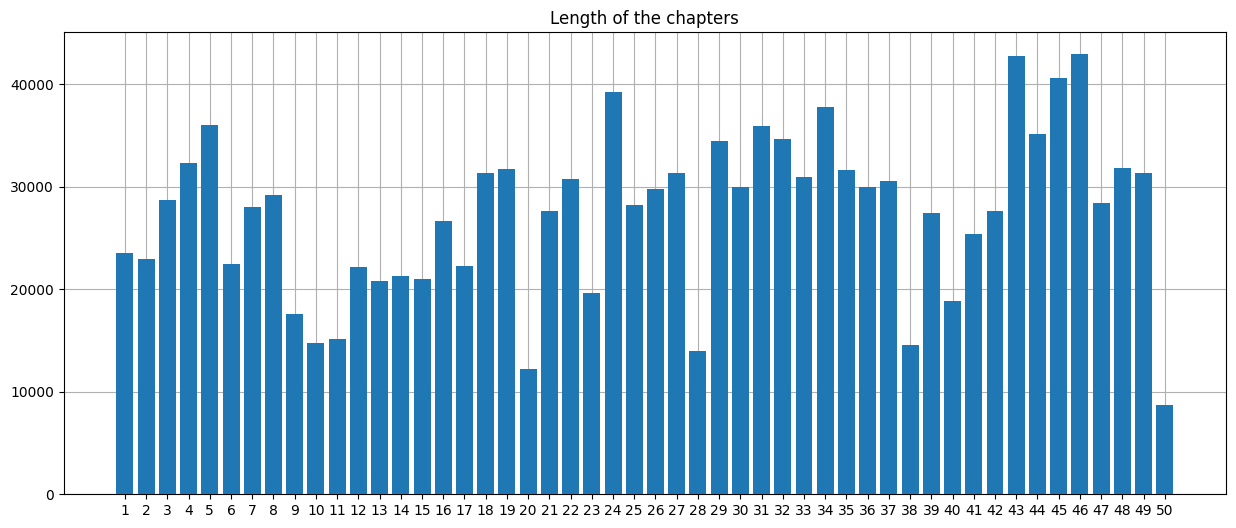

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar([str(i+1) for i in range(len(chapters_replaced))], [len(chapter) for chapter in chapters_replaced], zorder = 3)
# plt.hist([len(chapter) for chapter in chapters])
plt.title("Length of the chapters")
plt.grid(zorder=0)
plt.show()

In [ ]:
# The pronoun resolution is applied to every chapter
good_chapters = [resolve_coref(chapter, resolve_text=True) for chapter in chapters_replaced]

for i, chapter in enumerate(good_chapters[:3]):
  print(i, chapter[:50], "   |   ", chapter[-50:])

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

0 ('Towards the end of November , during a thaw , at nine o ’ clock one morning , a train on the Warsaw and Petersburg railway was approaching Warsaw at full speed . The morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking ; and it was impossible to distinguish anything more than a few yards away from the carriage windows . Some of the passengers by this particular train were returning from abroad ; but the third-class carriages were the best filled , chiefly with insignificant persons of various occupations and degrees , picked up at the different stations nearer Warsaw . All of them seemed weary , and most of them had sleepy eyes and a shivering expression , while their complexions generally appeared to have taken on the colour of the fog outside . When day dawned , two passengers in one of the third-class carriages found themselves opposite each other . Both were young fellows , both were rather poorly dressed , both had remarkable 

In [ ]:
good_chapters[0][0]

'Towards the end of November , during a thaw , at nine o ’ clock one morning , a train on the Warsaw and Petersburg railway was approaching Warsaw at full speed . The morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking ; and it was impossible to distinguish anything more than a few yards away from the carriage windows . Some of the passengers by this particular train were returning from abroad ; but the third-class carriages were the best filled , chiefly with insignificant persons of various occupations and degrees , picked up at the different stations nearer Warsaw . All of them seemed weary , and most of them had sleepy eyes and a shivering expression , while their complexions generally appeared to have taken on the colour of the fog outside . When day dawned , two passengers in one of the third-class carriages found themselves opposite each other . Both were young fellows , both were rather poorly dressed , both had remarkable fac

In [ ]:
a = chapters_replaced[0][:1000]
chapters[0]

'Towards the end of November, during a thaw, at nine o’clock one morning, a train on the Warsaw and Petersburg railway was approaching the latter city at full speed. The morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking; and it was impossible to distinguish anything more than a few yards away from the carriage windows.  Some of the passengers by this particular train were returning from abroad; but the third-class carriages were the best filled, chiefly with insignificant persons of various occupations and degrees, picked up at the different stations nearer town. All of them seemed weary, and most of them had sleepy eyes and a shivering expression, while their complexions generally appeared to have taken on the colour of the fog outside.  When day dawned, two passengers in one of the third-class carriages found themselves opposite each other. Both were young fellows, both were rather poorly dressed, both had remarkable faces, and bo

In [ ]:
doc = chapters[0][5000:5600]
resolved_text, clusters = resolve_coref(doc, resolve_text=True)
resolved_text

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

'“ Of course mine can ’ t argue the matter , because mine know only mine own case ; but mine doctor gave mine money—and Mr. Pavlicheff, who had been supporting me there had very little—to pay mine journey back , besides having kept mine at Mr. Pavlicheff, who had been supporting me there own expense , while there , for nearly two years. ” “ Why ? Was there no one else to pay for mine ? ” asked mine . “ No—Mr . Pavlicheff , who had been supporting mine there , died a couple of years ago . mine wrote to Mrs. General Epanchin at the time ( Mrs. General Epanchin is a distant relative of mine ) , but Mrs. General Epanchin did not answer mine letter . And so eventually mine came back. ” “ And where have mine come to ? ” “ That is—where am mine going to stay ? I—I '

In [ ]:
for cluster in clusters:
  names = []
  for coord in cluster:
    names.append(doc[coord[0]:coord[1]])
  print(names)

['I', 'I', 'my', 'my', 'me', 'my', 'me', 'you', 'the black-haired one', 'me', 'I', 'mine', 'my', 'I', 'you', 'I', 'I', 'I']
['my doctor', 'he', 'his', 'Mr. Pavlicheff, who had been supporting me there']
['Mrs. General Epanchin', 'she', 'she']


As we can see in the example above, the pronoun resolution detects some big clusters whith no noun on them so no resolutioncan be made there. Also some pronouns in the other clusters don't correspond to the noun: my doctor is not referring to Mr. Pavlicheff

That's why for this project it was decided not to use the pronoun resolution. Instead it was considered that valuable information could be obtained with just taking the principal character names and its different variations.

However, pronoun resolution is a very important task in NLP and in future projects it will be further researched and more alternatives will be tried in order to solve it.

# Characters appearances

In [ ]:
# Loading the book with the entity replaced
with open("/content/drive/MyDrive/Maastricht Univesity/Information Retrieval and Text Mining/Project/book_replaced.txt", 'r', encoding='utf-8') as file:
  book_replaced = file.read()

print(len(book_replaced))

# Divide by parts
parts_replaced = book_replaced.split("PART ")
parts_replaced = parts_replaced[1:]
parts_replaced[0] = parts_replaced[0][3:]
parts_replaced[1] = parts_replaced[1][4:]
parts_replaced[2] = parts_replaced[2][5:]
parts_replaced[3] = parts_replaced[3][4:]

print("Parts of the book:")
[print(part[:100], len(part)) for part in parts_replaced];

import copy
import re

# Divide by chapters
chapter_markers = [" I"," II"," III"," IV"," V"," VI"," VII"," VIII"," IX"," X"," XI"," XII"," XIII"," XIV"," XV"," XVI"]
chapters_dict = {0:16, 1:12, 2:10, 3:12} # How many chapters in each part
chapters_replaced = []

for n_part, part in enumerate(parts_replaced):

  for n_chapter in range(chapters_dict[n_part]):

    if n_chapter < (chapters_dict[n_part] - 1):

      pattern = r'{}\.(.*?){}\.'.format(chapter_markers[n_chapter], chapter_markers[n_chapter+1])
      
      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters_replaced.append(chapter)
    
    else: # For the last chapter
      pattern = r'{}\.(.*)'.format(chapter_markers[n_chapter])

      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters_replaced.append(chapter)

print("\nNumber of chpaters in the book: ", len(chapters_replaced))

for i, chapter in enumerate(chapters_replaced[:3]):
  print(i, chapter[:50], "   |   ", chapter[-50:])

1373063
Parts of the book:
 I.  Towards the end of November, during a thaw, at nine o’clock one morning, a train on the Warsaw  382999
 I.  Two days after the strange conclusion to Nastasia Philipovna’s birthday party, with the record  318439
 I.  The General Epanchin family, or at least the more serious members of it, were sometimes grieved 310604
 I.  A week had elapsed since the rendezvous of our two friends on the green bench in the park, when 360984

Number of chpaters in the book:  50
0 Towards the end of November, during a thaw, at nin    |     his destination, he determined to take a droshky.
1 General Epanchin lived in his own house near the L    |    f Gania cried:  “Come in please, Prince Muishkin!”
2 General General Epanchin was standing in the middl    |    hkin immediately followed the man out of the room.


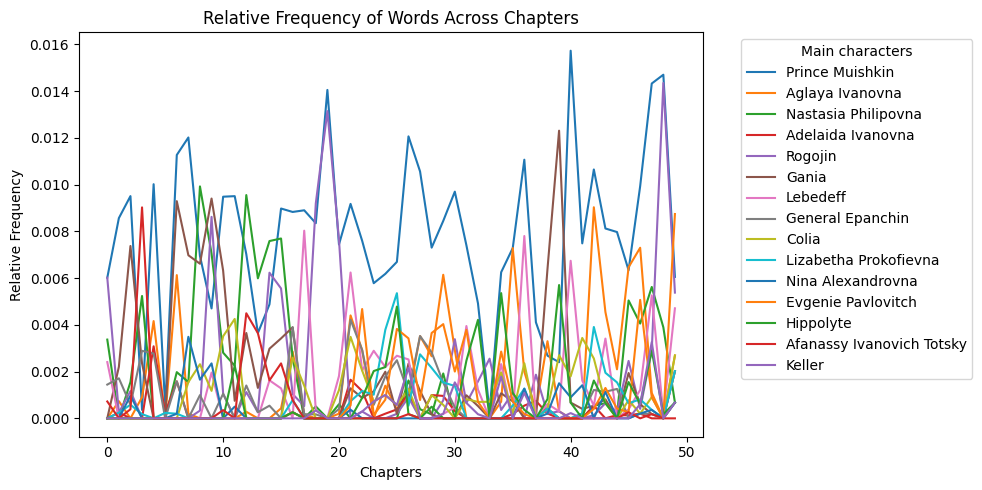

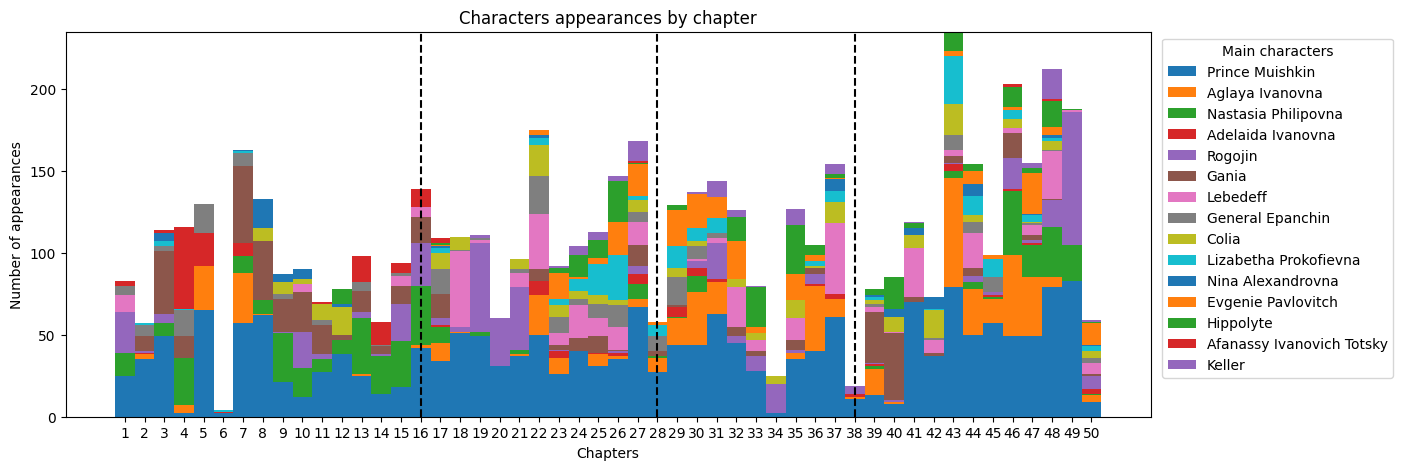

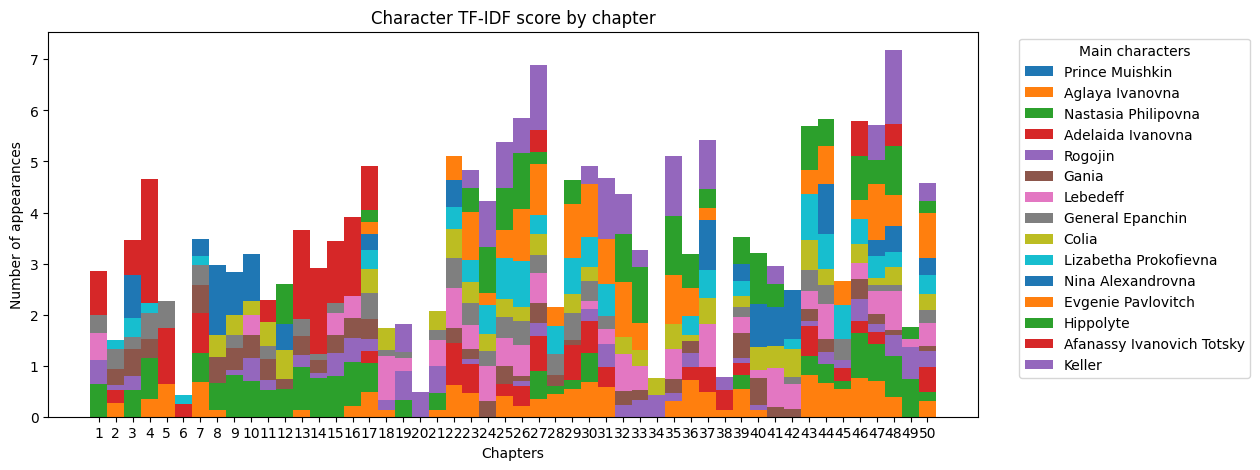

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_relative_frequency(text, term):
    pattern = r'\b{}\b'.format(re.escape(term))
    matches = re.findall(pattern, text, re.IGNORECASE)
    total_words = len(text.split())
    term_count = len(matches)
    if term_count == 0:
      relative_frequency = 0
    else:
      relative_frequency = term_count / total_words
      # relative_frequency = np.log(term_count / total_words)
    return relative_frequency, term_count

terms_to_calculate = characters.keys()

relative_frequencies = {term: [] for term in terms_to_calculate}
counts = {term: [] for term in terms_to_calculate}
df = {term: [] for term in terms_to_calculate}

for chapter in chapters_replaced:
    for term in terms_to_calculate:
        frequency, term_count = calculate_relative_frequency(chapter, term)
        relative_frequencies[term].append(frequency)
        counts[term].append(term_count)

# Calculating tf-idf scores

documents = chapters_replaced

tf = counts
df = {term: sum([1 for doc in documents if term in doc]) for term in terms_to_calculate}

# All the scores
all_tf_idf = np.zeros((len(terms_to_calculate), len(documents)))
N = len(documents)

for term_index, term in enumerate(terms_to_calculate):
  for doc_index, doc in enumerate(documents):

    all_tf_idf[term_index, doc_index] = np.log(1 + tf[term][doc_index]) * np.log10(N/df[term])

# Plotting the relative frequencies
fig, ax = plt.subplots(figsize=(10,5))

x = range(50)
for term in terms_to_calculate:
    ax.plot([val for val in x], relative_frequencies[term], label=term)

ax.set_xlabel("Chapters")
ax.set_ylabel("Relative Frequency")
ax.set_title("Relative Frequency of Words Across Chapters")
ax.legend(bbox_to_anchor=(1.05,1), title="Main characters")
plt.tight_layout()
plt.show()

# Plotting the counts of the appearances
species = ([str(i+1) for i in range(50)])

weight_counts = counts
width = 1

fig, ax = plt.subplots(figsize=(14,5))
bottom = np.zeros(50)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Characters appearances by chapter")
ax.set_xlabel("Chapters")
ax.set_ylabel("Number of appearances")
ax.legend(loc="upper right", bbox_to_anchor=(1.23,1), title="Main characters")

plt.axvline(x=15, ls='--', color='black')
plt.axvline(x=27, ls='--', color='black')
plt.axvline(x=37, ls='--', color='black')

plt.show()

# Plotting the tf-idf scores
species = ([str(i+1) for i in range(50)])

weight_counts = all_tf_idf
width = 1

fig, ax = plt.subplots(figsize=(12,5))
bottom = np.zeros(50)

for i in range(weight_counts.shape[0]):
  boolean = list(terms_to_calculate)[i]
  weight_count = weight_counts[i]
  p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
  bottom += weight_count

ax.set_title("Character TF-IDF score by chapter")
ax.set_xlabel("Chapters")
ax.set_ylabel("Number of appearances")
ax.legend(loc="upper right", bbox_to_anchor=(1.3,1), title="Main characters")

plt.show()

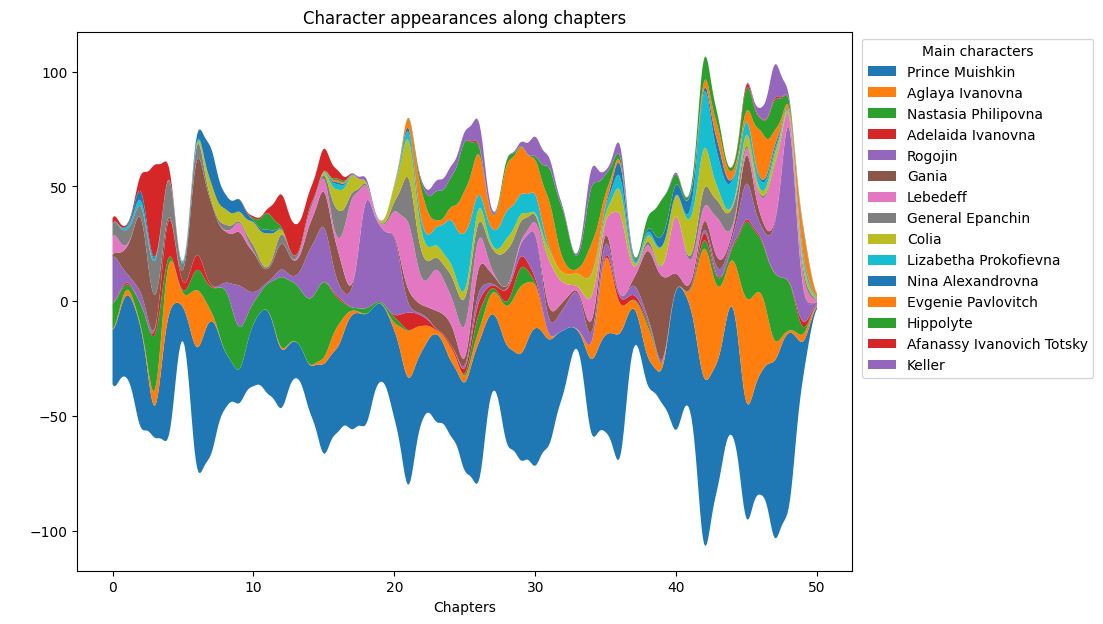

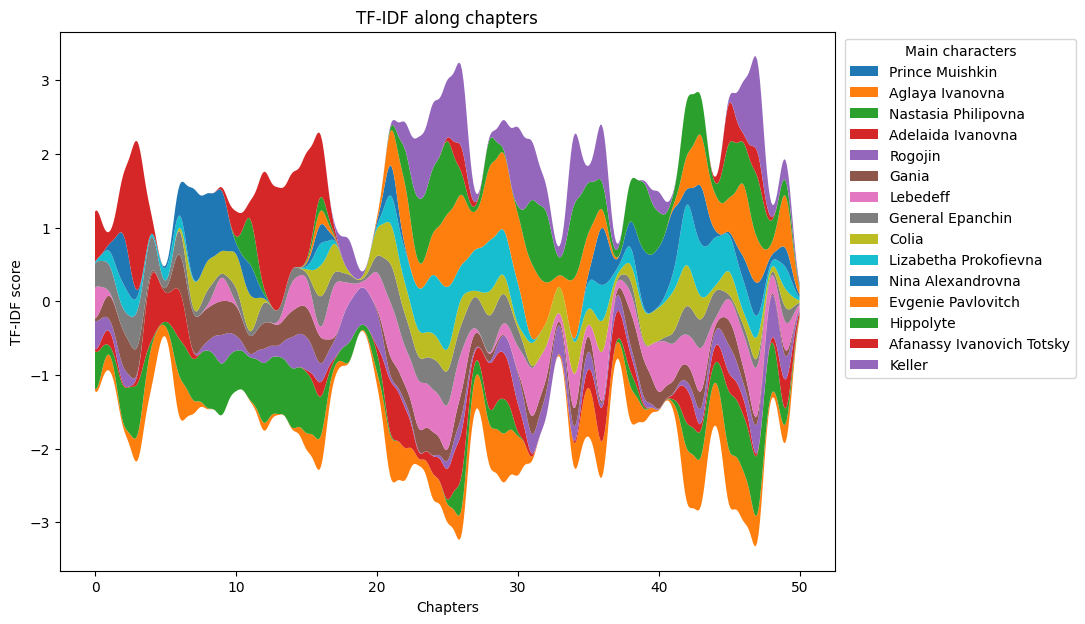

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy import inf

def stream_plot(y, plot_title, y_label):

  # x = np.arange(1990, 2020) # (N,) array-like
  x = np.arange(50)
  y = np.asarray(y)
  # y = np.nan_to_num(y, neginf=-10) 

  def gaussian_smooth(x, y, grid, sd):
      weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
      weights = weights
      return (weights * y).sum(1)

  fig, ax = plt.subplots(figsize=(10, 7))
  grid = np.linspace(0, 50, num=500)
  y_smoothed = [gaussian_smooth(x, y_, grid, 0.5) for y_ in y]
  ax.stackplot(grid, y_smoothed, baseline="sym", labels = list(characters.keys()))
  ax.legend(bbox_to_anchor=(1.32,1), title="Main characters")
  # ax.set_yticks([]) 
  ax.set_xlabel("Chapters")
  ax.set_ylabel(y_label)
  plt.title(plot_title)
  plt.show()

  return

# y = [relative_frequencies[key] for key in relative_frequencies.keys()]
# stream_plot(y, "Term relative frequency along chapters")
y = [counts[key] for key in counts.keys()] # 15x50
stream_plot(y, "Character appearances along chapters", " ")
y = [all_tf_idf[i] for i in range(15)]
stream_plot(y, "TF-IDF along chapters", "TF-IDF score")

# Interactions

In [ ]:
import re
import numpy as np
import copy
import nltk
from nltk import word_tokenize
nltk.download("punkt")

token_book = word_tokenize(book_replaced)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def build_cooccurrence_matrix(characters, text, window_size):
    num_characters = len(characters)
    cooccurrence_matrix = np.zeros((num_characters, num_characters), dtype=np.int32)
    char_index = {char: index for index, char in enumerate(characters)}
    
    # Iterate through the preprocessed text
    for i in range(len(text)):
        if text[i] in characters:
            current_character = text[i]
            current_index = char_index[current_character]
            
            # Scan within the defined window size
            for j in range(i - window_size, i + window_size + 1):
                if j != i and 0 <= j < len(text) and text[j] in characters:
                    target_character = text[j]
                    target_index = char_index[target_character]
                    cooccurrence_matrix[current_index, target_index] += 1
    
    return cooccurrence_matrix

In [ ]:
# Merged tokens
characters_list = list(characters.keys())
characters_ = []
book_replaced_ = copy.deepcopy(book_replaced)

for character in characters_list:
  if " " in character:
    new_name = character.replace(" ","_")
    characters_.append(new_name)
    book_replaced_ = book_replaced_.replace(character, new_name)
  else:
    characters_.append(character)

token_book = word_tokenize(book_replaced_)
characters_

['Prince_Muishkin',
 'Aglaya_Ivanovna',
 'Nastasia_Philipovna',
 'Adelaida_Ivanovna',
 'Rogojin',
 'Gania',
 'Lebedeff',
 'General_Epanchin',
 'Colia',
 'Lizabetha_Prokofievna',
 'Nina_Alexandrovna',
 'Evgenie_Pavlovitch',
 'Hippolyte',
 'Afanassy_Ivanovich_Totsky',
 'Keller']

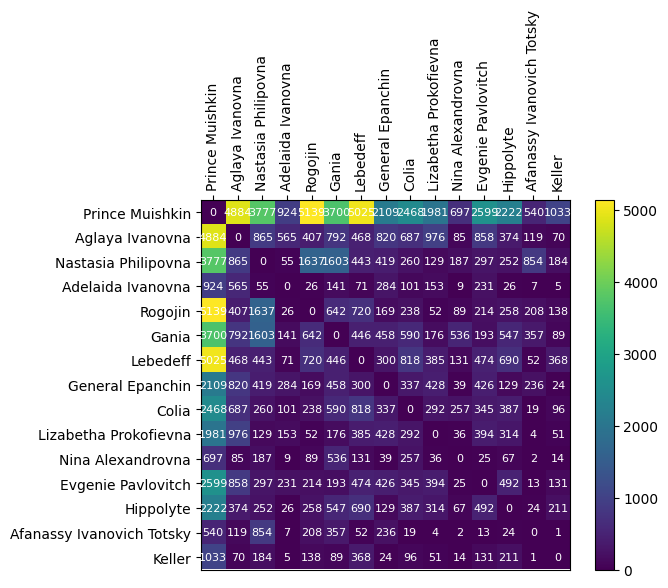

In [ ]:
matrix = build_cooccurrence_matrix(characters_, token_book, 750)
for i in range(matrix.shape[0]):
  matrix[i,i] = 0

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the matrix
im = ax.imshow(matrix, cmap='viridis')

# Add annotations for the interaction numbers
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.annotate(str(matrix[i, j]), xy=(j, i), horizontalalignment='center', verticalalignment='center', fontsize=8, color="white")

# Set ticks and tick labels on the top
labels = characters_list
ax.xaxis.tick_top()  # Set ticks on top
ax.set_xticks(np.arange(matrix.shape[1]))  # Set the x-ticks
ax.set_yticks(np.arange(matrix.shape[0]))  # Set the y-ticks
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)

# Show the colorbar
plt.colorbar(im)

# Show the plot
plt.show()

In [ ]:
# Transforming the matrix into a .csv to import it to Flourish Studio
import pandas as pd

interactions_df = pd.DataFrame(columns=["Character1", "Character2", "Interactions"])

# Iterate over the co-occurrence matrix and populate the DataFrame
for i in range(len(characters_list)):
    for j in range(i, len(characters_list)):
        character1 = characters_list[i]
        character2 = characters_list[j]
        interactions = matrix[i, j]
        interactions_df = interactions_df.append({"Character1": character1,
                                                  "Character2": character2,
                                                  "Interactions": interactions},
                                                 ignore_index=True)

# Print the interactions DataFrame
print(interactions_df)

                    Character1                 Character2 Interactions
0              Prince Muishkin            Prince Muishkin            0
1              Prince Muishkin            Aglaya Ivanovna         4884
2              Prince Muishkin        Nastasia Philipovna         3777
3              Prince Muishkin          Adelaida Ivanovna          924
4              Prince Muishkin                    Rogojin         5139
..                         ...                        ...          ...
115                  Hippolyte  Afanassy Ivanovich Totsky           24
116                  Hippolyte                     Keller          211
117  Afanassy Ivanovich Totsky  Afanassy Ivanovich Totsky            0
118  Afanassy Ivanovich Totsky                     Keller            1
119                     Keller                     Keller            0

[120 rows x 3 columns]


<ipython-input-41-50b219395f4d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append({"Character1": character1,
<ipython-input-41-50b219395f4d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append({"Character1": character1,
<ipython-input-41-50b219395f4d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append({"Character1": character1,
<ipython-input-41-50b219395f4d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interactions_df = interactions_df.append({"Character1": character1,
<ipython-input-41-50b219395f4d>:12: FutureWa

In [ ]:
interactions_df.to_csv("interactions750.csv")

# Text classification

## Dividing in paragraphs

In [ ]:
with open("/content/drive/MyDrive/Maastricht Univesity/Information Retrieval and Text Mining/Project/the_idiot_raw.txt", 'r', encoding='utf-8') as file:
    # Read the contents of the file into a string
    book = file.read()
book = book.replace("\n\n", " /PARAGRAPH/ ")
book = book.replace("\n", " ")
book[:1000]

'\ufeffPART I /PARAGRAPH/  I. /PARAGRAPH/ Towards the end of November, during a thaw, at nine o’clock one morning, a train on the Warsaw and Petersburg railway was approaching the latter city at full speed. The morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking; and it was impossible to distinguish anything more than a few yards away from the carriage windows. /PARAGRAPH/ Some of the passengers by this particular train were returning from abroad; but the third-class carriages were the best filled, chiefly with insignificant persons of various occupations and degrees, picked up at the different stations nearer town. All of them seemed weary, and most of them had sleepy eyes and a shivering expression, while their complexions generally appeared to have taken on the colour of the fog outside. /PARAGRAPH/ When day dawned, two passengers in one of the third-class carriages found themselves opposite each other. Both were young fellows, bot

In [ ]:
# Divide by parts
parts = book.split("PART ")
parts = parts[1:]
parts[0] = parts[0][3:]
parts[1] = parts[1][4:]
parts[2] = parts[2][5:]
parts[3] = parts[3][4:]

print("Parts of the book:")
[print(part[:100], len(part)) for part in parts];

import copy
import re

# Divide by chapters
chapter_markers = [" I"," II"," III"," IV"," V"," VI"," VII"," VIII"," IX"," X"," XI"," XII"," XIII"," XIV"," XV"," XVI"]
chapters_dict = {0:16, 1:12, 2:10, 3:12} # How many chapters in each part
chapters = []

for n_part, part in enumerate(parts):

  for n_chapter in range(chapters_dict[n_part]):

    if n_chapter < (chapters_dict[n_part] - 1):

      pattern = r'{}\.(.*?){}\.'.format(chapter_markers[n_chapter], chapter_markers[n_chapter+1])
      
      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters.append(chapter)
    
    else: # For the last chapter
      pattern = r'{}\.(.*)'.format(chapter_markers[n_chapter])

      chapter = re.search(pattern, part, re.DOTALL).group(1).strip()

      chapters.append(chapter)

print("\nNumber of chpaters in the book: ", len(chapters))

for i, chapter in enumerate(chapters[:3]):
  print(i, chapter[:50], "   |   ", chapter[-50:])

Parts of the book:
PARAGRAPH/  I. /PARAGRAPH/ Towards the end of November, during a thaw, at nine o’clock one morning,  392131
PARAGRAPH/  I. /PARAGRAPH/ Two days after the strange conclusion to Nastasia Philipovna’s birthday p 326262
PARAGRAPH/  I. /PARAGRAPH/ The Epanchin family, or at least the more serious members of it, were som 319104
PARAGRAPH/  I. /PARAGRAPH/ A week had elapsed since the rendezvous of our two friends on the green b 367966

Number of chpaters in the book:  50
0 /PARAGRAPH/ Towards the end of November, during a     |    tion, he determined to take a droshky. /PARAGRAPH/
1 /PARAGRAPH/ General Epanchin lived in his own hous    |     /PARAGRAPH/ “Come in please, prince!” /PARAGRAPH/
2 /PARAGRAPH/ General Ivan Fedorovitch Epanchin was     |    tely followed the man out of the room. /PARAGRAPH/


Total number of paragraphs: 5212
Minimum number of paragraphs in a chapter: 21


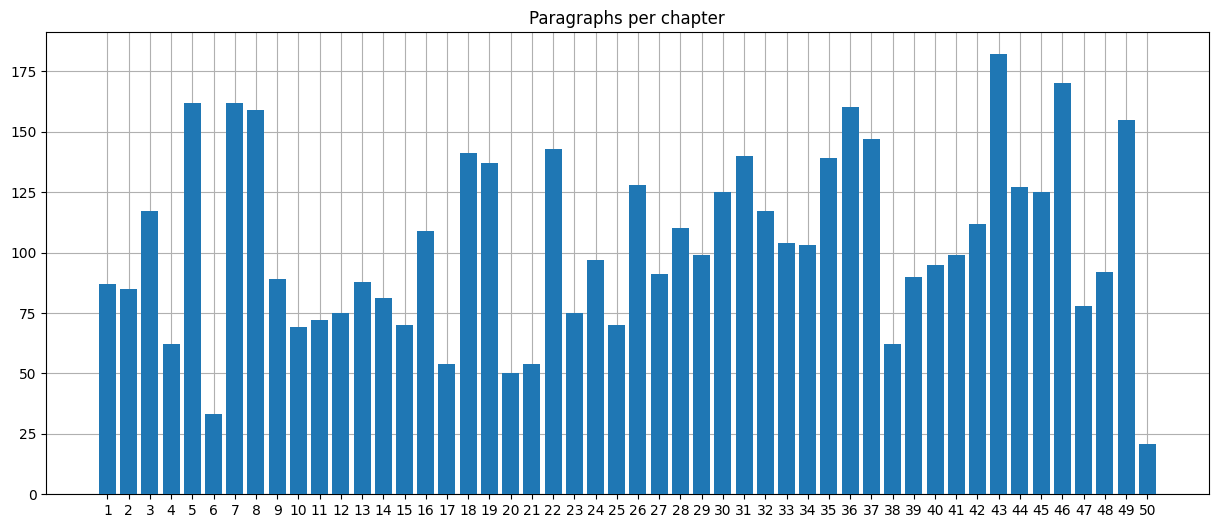

In [ ]:
# Divide by paragraphs
all_paragraphs = [chapter.split("/PARAGRAPH/ ")[1:] for chapter in chapters]

print(f"Total number of paragraphs: {sum([len(i) for i in all_paragraphs])}")
print(f"Minimum number of paragraphs in a chapter: {min([len(i) for i in all_paragraphs])}")

# indexes = [0,1,5,-2,-1]
# [print(index, all_paragraphs[index]) for index in indexes];

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.bar([str(i+1) for i in range(50)], [len(i) for i in all_paragraphs], zorder = 3)
plt.title("Paragraphs per chapter")
plt.grid(zorder=0)
plt.show()

## Importing the model

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.3 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

text = "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."
text = "My father picked up all these pictures very cheap at auctions, and so \
on,” he said; “they are all rubbish, except the one over the door, and \
that is valuable. A man offered five hundred roubles for it last week."
text = "Who indeed? exclaimed Prince S."

# Loading the models
model_name = "j-hartmann/emotion-english-distilroberta-base"
# model_name = "j-hartmann/emotion-english-roberta-large"
# model_name = "michellejieli/emotion_text_classifier"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model_name)

classifier(text)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'surprise', 'score': 0.9610987305641174}]

In [ ]:
import numpy as np
import time

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy import inf

# This ufnction is used to classify all the  neccesary for the evaluation
def classify_text(model, n_par, seed, n_emotions = 7):
  
  np.random.seed(seed)
  
  paragraphs_used = []
  all_emotions = []

  for i, paragraphs in enumerate(all_paragraphs):

    par = []
    par_emotions = []
    indexes = np.random.randint(0,len(paragraphs), n_par)
    
    for index in indexes:

      # print(i, index)
      text = paragraphs[index]
      inputs = tokenizer(text, return_tensors="pt")

      if inputs['input_ids'].shape[1] >= 250: # The maximum token size for the model is 512

        while inputs['input_ids'].shape[1] >= 250:
          
          new_index = np.random.randint(0,len(paragraphs))
          text = paragraphs[new_index]
          inputs = tokenizer(text, return_tensors="pt")

        index = new_index

      with torch.no_grad():
          logits = model(**inputs).logits

          predicted_class_id = logits.argmax().item()

      emotion = model.config.id2label[predicted_class_id]

      par_emotions.append(emotion)
      par.append(paragraphs[index])

    all_emotions.append(par_emotions)
    paragraphs_used.append(par)

    emotions_array = np.zeros((n_par, 50))

  for chapter in range(50):
    for paragraph in range(n_par):
      emotions_array[paragraph, chapter] = model.config.label2id[all_emotions[chapter][paragraph]]

  emotions_hist = np.zeros((n_emotions,50))

  for chapter in range(50):
    for emotion in range(n_emotions):
      emotions_hist[emotion, chapter] = emotions_array[:,chapter][emotions_array[:,chapter] == emotion].shape[0]

  return emotions_array, emotions_hist, paragraphs_used

def stream_plot(y, plot_title, plot_labels, smoothing=0.6):

  # x = np.arange(1990, 2020) # (N,) array-like
  x = np.arange(50)
  y = np.asarray(y)
  # y = np.nan_to_num(y, neginf=-10) 

  def gaussian_smooth(x, y, grid, sd):
      weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
      weights = weights
      return (weights * y).sum(1)

  fig, ax = plt.subplots(figsize=(10, 7))
  grid = np.linspace(0, 50, num=500)
  y_smoothed = [gaussian_smooth(x, y_, grid, smoothing) for y_ in y]
  ax.stackplot(grid, y_smoothed, baseline="sym", labels = plot_labels)
  ax.legend(bbox_to_anchor=(1.15,1), title="Emotions")
  ax.set_yticks([]) 
  ax.set_xlabel("Chapters")
  plt.title(plot_title)
  plt.show()
  fig.savefig("stream_plot.png", format='png', dpi=1200)

  return

## Classifying text

Token indices sequence length is longer than the specified maximum sequence length for this model (617 > 512). Running this sequence through the model will result in indexing errors


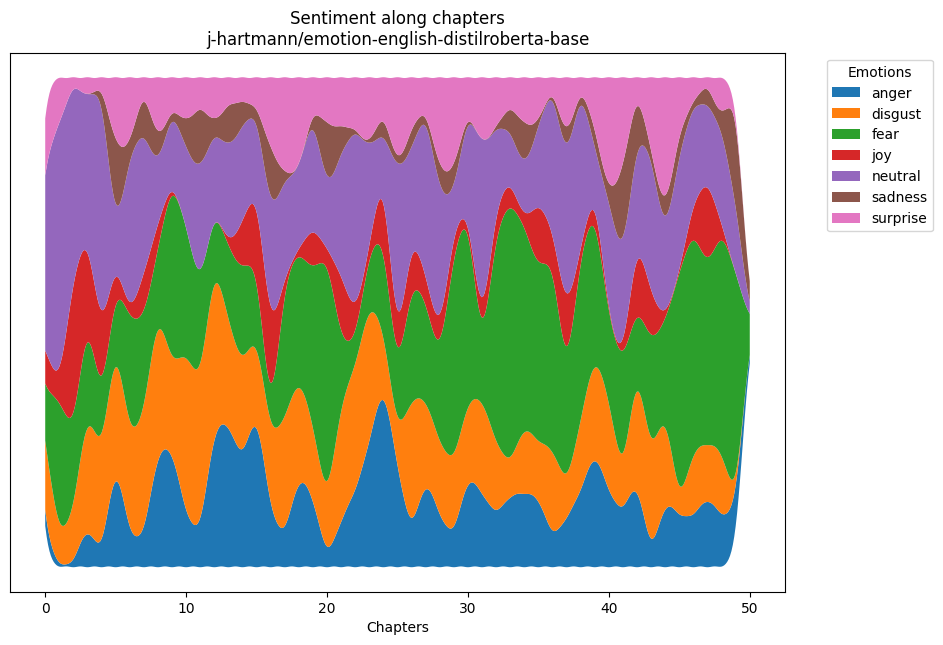

Execution time:  180.5685305595398


In [ ]:
start = time.time()

n_par = 20
random_seed = 16

emotions_array, emotions_hist, paragraphs_used = classify_text(model, n_par, random_seed)
labels = model.config.label2id.keys()
stream_plot(emotions_hist, "Sentiment along chapters\n" + model_name, labels, 0.6)

print("Execution time: ", time.time() - start)

## Quantitive results

In [ ]:
# Random subset of paragrpahs to manually annotate
np.random.seed(48)
random_indexes = np.random.randint(0,20,50)

random_subset = [paragraphs[random_indexes[i]] for i, paragraphs in enumerate(paragraphs_used)]
predicted_labels = [emotions_array[index, i] for i, index in enumerate(random_indexes)]
[print(i, par) for i, par in enumerate(random_subset)];

0 “Parfen Rogojin? dear me—then don’t you belong to those very Rogojins, perhaps—” began the clerk, with a very perceptible increase of civility in his tone. 
1 “Oh dear no, you can be perfectly easy on that score. I have quite another matter on hand.” 
2 “Wonderful!” said Gania. “And he knows it too,” he added, with a sarcastic smile. 
3 At the end of that time, and about four months after Totski’s last visit (he had stayed but a fortnight on this occasion), a report reached Nastasia Philipovna that he was about to be married in St. Petersburg, to a rich, eminent, and lovely woman. The report was only partially true, the marriage project being only in an embryo condition; but a great change now came over Nastasia Philipovna. She suddenly displayed unusual decision of character; and without wasting time in thought, she left her country home and came up to St. Petersburg, straight to Totski’s house, all alone. 
4 “The impression was forcible—” the prince began. 
5 “She was very quiet al

In [ ]:
model.config.label2id

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'joy': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

In [ ]:
# Manual annotation
import numpy as np
true_labels = np.array([4,3,3,6,4,1,0,3,4,0,3,1,6,4,5,0,1,4,4,6,2,6,4,6,4,6,4,4,1,2,5,4,3,4,1,6,3,4,4,4,1,3,3,4,4,4,6,4,4,0])
true_labels.shape

(50,)

In [ ]:
n = 17
# print(random_subset[n])
for n in range(50):
  print(str(n) + " : ",true_labels[n], int(labels_model1[n]), int(labels_model2[n]), int(labels_model3[n]))

0 :  4 4 4 4
1 :  3 4 4 4
2 :  3 3 0 3
3 :  6 2 3 4
4 :  4 1 1 4
5 :  1 0 0 0
6 :  0 0 0 0
7 :  3 4 4 4
8 :  4 1 5 1
9 :  0 2 2 0
10 :  3 1 5 4
11 :  1 1 0 0
12 :  6 1 6 3
13 :  4 4 4 1
14 :  5 5 5 4
15 :  0 0 0 0
16 :  1 1 0 1
17 :  4 2 4 4
18 :  4 1 6 4
19 :  6 6 1 6
20 :  2 2 1 4
21 :  6 4 6 4
22 :  4 3 3 4
23 :  6 6 2 4
24 :  4 1 1 1
25 :  6 4 4 4
26 :  4 2 4 4
27 :  4 4 4 4
28 :  1 5 5 4
29 :  2 2 2 2
30 :  5 0 0 0
31 :  4 4 4 4
32 :  3 3 3 3
33 :  4 2 4 4
34 :  1 1 0 4
35 :  6 2 2 1
36 :  3 2 2 4
37 :  4 3 3 0
38 :  4 2 4 4
39 :  4 2 2 4
40 :  1 1 0 4
41 :  3 5 5 3
42 :  3 3 3 3
43 :  4 2 1 5
44 :  4 6 4 4
45 :  4 2 6 2
46 :  6 2 0 4
47 :  4 2 4 4
48 :  4 2 2 4
49 :  0 0 0 4


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(true_labels, predicted_labels, average='micro')

print("Results of : ", model_name)
print("Precision: {:.4f}".format(precision))

Results of :  j-hartmann/emotion-english-roberta-large
Precision: 0.3800


In [ ]:
labels_model2 = predicted_labels

In [ ]:
labels_model1 = [4.0, 4.0, 3.0, 2.0, 1.0, 0.0, 0.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 5.0, 0.0, 1.0, 2.0, 1.0, 6.0, 2.0, 4.0, 3.0, 6.0, 1.0, 4.0, 2.0, 4.0, 5.0, 2.0, 0.0, 4.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 5.0, 3.0, 2.0, 6.0, 2.0, 2.0, 2.0, 2.0, 0.0]
labels_model2 = [4.0, 4.0, 0.0, 3.0, 1.0, 0.0, 0.0, 4.0, 5.0, 2.0, 5.0, 0.0, 6.0, 4.0, 5.0, 0.0, 0.0, 4.0, 6.0, 1.0, 1.0, 6.0, 3.0, 2.0, 1.0, 4.0, 4.0, 4.0, 5.0, 2.0, 0.0, 4.0, 3.0, 4.0, 0.0, 2.0, 2.0, 3.0, 4.0, 2.0, 0.0, 5.0, 3.0, 1.0, 4.0, 6.0, 0.0, 4.0, 2.0, 0.0]
labels_model3 = [4.0, 4.0, 3.0, 4.0, 4.0, 0.0, 0.0, 4.0, 1.0, 0.0, 4.0, 0.0, 3.0, 1.0, 4.0, 0.0, 1.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 2.0, 0.0, 4.0, 3.0, 4.0, 4.0, 1.0, 4.0, 0.0, 4.0, 4.0, 4.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0]

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa_1_2 = cohen_kappa_score(labels_model1, labels_model2)
kappa_2_3 = cohen_kappa_score(labels_model2, labels_model3)
kappa_3_1 = cohen_kappa_score(labels_model3, labels_model1)

# Calculate the average kappa coefficient
overall_kappa = (kappa_1_2 + kappa_2_3 + kappa_3_1) / 3

print("Cohen's kappa coefficient between 1 & 2: {:.4f}".format(kappa_1_2))
print("Cohen's kappa coefficient between 1 & 3: {:.4f}".format(kappa_3_1))
print("Cohen's kappa coefficient between 2 & 3: {:.4f}".format(kappa_2_3))
print()
print("Overall Cohen's kappa coefficient: {:.4f}".format(overall_kappa))

Cohen's kappa coefficient between 1 & 2: 0.4593
Cohen's kappa coefficient between 1 & 3: 0.2925
Cohen's kappa coefficient between 2 & 3: 0.2651

Overall Cohen's kappa coefficient: 0.3390


In [ ]:
print(labels_model1)
print(labels_model2)
print(labels_model3)

[4.0, 4.0, 3.0, 2.0, 1.0, 0.0, 0.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 5.0, 0.0, 1.0, 2.0, 1.0, 6.0, 2.0, 4.0, 3.0, 6.0, 1.0, 4.0, 2.0, 4.0, 5.0, 2.0, 0.0, 4.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 5.0, 3.0, 2.0, 6.0, 2.0, 2.0, 2.0, 2.0, 0.0]
[4.0, 4.0, 0.0, 3.0, 1.0, 0.0, 0.0, 4.0, 5.0, 2.0, 5.0, 0.0, 6.0, 4.0, 5.0, 0.0, 0.0, 4.0, 6.0, 1.0, 1.0, 6.0, 3.0, 2.0, 1.0, 4.0, 4.0, 4.0, 5.0, 2.0, 0.0, 4.0, 3.0, 4.0, 0.0, 2.0, 2.0, 3.0, 4.0, 2.0, 0.0, 5.0, 3.0, 1.0, 4.0, 6.0, 0.0, 4.0, 2.0, 0.0]
[4.0, 4.0, 3.0, 4.0, 4.0, 0.0, 0.0, 4.0, 1.0, 0.0, 4.0, 0.0, 3.0, 1.0, 4.0, 0.0, 1.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 2.0, 0.0, 4.0, 3.0, 4.0, 4.0, 1.0, 4.0, 0.0, 4.0, 4.0, 4.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0]


In [ ]:
# Top 5 predictions
# predicted_class_id = logits.argmax().item()
# print(model.config.id2label[predicted_class_id])
# predicted_ids = torch.topk(logits.flatten(), 5).indices
# print(predicted_ids)
# [model.config.id2label[id.item()] for id in predicted_ids]

joy
tensor([1, 2, 5, 3, 0])


['joy', 'love', 'surprise', 'anger', 'sadness']